<a href="https://colab.research.google.com/github/alilotfi90/Ali_in_the_Quantum_Land/blob/main/quantum_fourier_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit==0.37

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.7/929.7 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 16.

In [3]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector

from qiskit.tools.monitor import job_monitor


import matplotlib
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
from qiskit.visualization import circuit_drawer

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(pi/3,1,0)

qc.draw()




┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/3) 
q_1: ┤ X ├─■───────
     └───┘

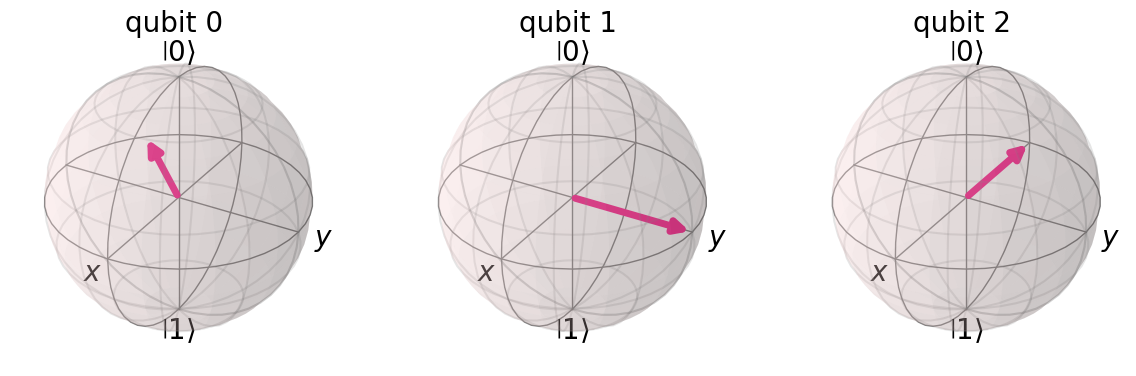

In [22]:
# this part is solely to build some intuition for QFT on 3 qubit input.
qc = QuantumCircuit(3)

qc.x([0,2])
qc.h(2)
qc.cp(pi/2,1,2)
qc.cp(pi/4,0,2)
qc.barrier()



qc.h(1)
qc.cp(pi/2,0,1)
qc.barrier()



qc.h(0)
qc.swap(0,2)
qc.barrier()

qc.draw()


sv_sim = Aer.get_backend('statevector_simulator')
qobj= assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()

display(plot_bloch_multivector(statevector))

In [23]:
qc.draw()

┌───┐                        ░                ░ ┌───┐    ░ 
q_0: ┤ X ├───────────────■────────░───────■────────░─┤ H ├─X──░─
     └───┘               │        ░ ┌───┐ │P(π/2)  ░ └───┘ │  ░ 
q_1: ───────────■────────┼────────░─┤ H ├─■────────░───────┼──░─
     ┌───┐┌───┐ │P(π/2)  │P(π/4)  ░ └───┘          ░       │  ░ 
q_2: ┤ X ├┤ H ├─■────────■────────░────────────────░───────X──░─
     └───┘└───┘                   ░                ░          ░

In [29]:
from math import pi

def qft_rotations(qc, n):

  if n == 0:
    return

  n=n-1
  qc.h(n)

  for qubit in range(n):
    qc.cp(pi/2**(n-qubit), qubit, n)

  qc.barrier()
  qft_rotations(qc, n)

def swapregisters(qc, n):
  for qubit in range(n//2):
    qc.swap(qubit, n-qubit-1)

n = 4
qc = QuantumCircuit(n)
qft_rotations(qc, n)
swapregisters(qc, n)
qc.draw()

░                         ░      »
q_0: ──────■──────────────────────────░───────■─────────────────░──────»
           │                          ░       │                 ░ ┌───┐»
q_1: ──────┼────────■─────────────────░───────┼────────■────────░─┤ H ├»
           │        │                 ░ ┌───┐ │P(π/4)  │P(π/2)  ░ └───┘»
q_2: ──────┼────────┼────────■────────░─┤ H ├─■────────■────────░──────»
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2)  ░ └───┘                   ░      »
q_3: ┤ H ├─■────────■────────■────────░─────────────────────────░──────»
     └───┘                            ░                         ░      »
«               ░ ┌───┐ ░       
«q_0: ─■────────░─┤ H ├─░──X────
«      │P(π/2)  ░ └───┘ ░  │    
«q_1: ─■────────░───────░──┼──X─
«               ░       ░  │  │ 
«q_2: ──────────░───────░──┼──X─
«               ░       ░  │    
«q_3: ──────────░───────░──X────
«               ░       ░

In [36]:
def qft(qc, n):
  qft_rotations(qc, n)
  swapregisters(qc, n)
  return qc

def inverse_qft(qc,n):
  qft_circ=  qft( QuantumCircuit(n),n )
  invqft_cir = qft_circ.inverse()
  qc.append( invqft_cir,qc.qubits[:n] )
  return qc.decompose()



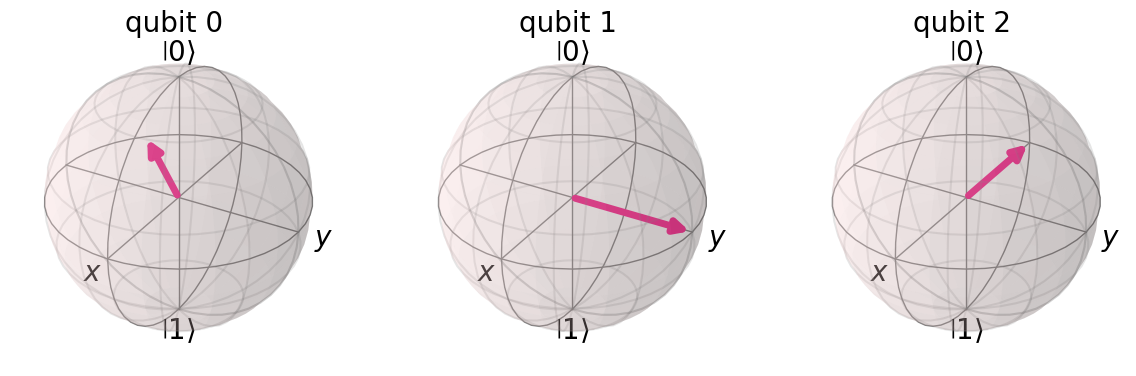

In [37]:
n = 3
qc = QuantumCircuit(n)
qc.x([0,2])
qc = qft(qc, n)

qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(statevector))


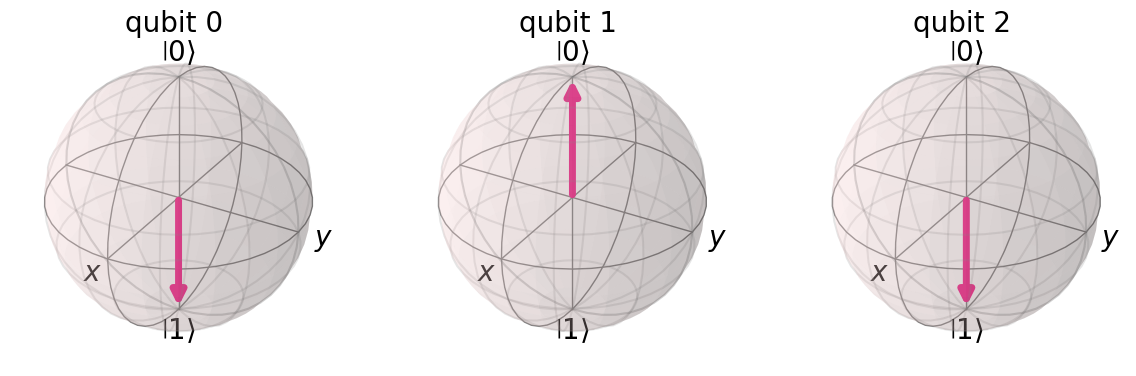

In [38]:
qc2 = inverse_qft(qc,n)

qobj = assemble(qc2)
statevector = sv_sim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(statevector))
